In [7]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import additional required libraries
import tensorflow as tf
from mrcnn import model as modellib
from mrcnn import utils
from mrcnn.config import Config
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

# Define Mask R-CNN Configuration
class CustomConfig(Config):
    NAME = "custom"
    
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + your class
    
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    
    # Learning rate
    LEARNING_RATE = 0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # Setting batch size
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1

# Function to prepare dataset
def prepare_dataset(df, BASE_PATH, target_size=(1024, 1024)):
    images = []
    masks = []
    
    for idx, row in df.iterrows():
        # Load image
        img_path = os.path.join(BASE_PATH, str(row['filename']))
        if os.path.exists(img_path):
            # Read and preprocess image
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size)
            
            # Create mask (you'll need to modify this based on your annotations)
            mask = np.zeros(target_size + (1,), dtype=np.bool)
            # Add mask creation logic here based on your annotations
            
            images.append(image)
            masks.append(mask)
    
    return np.array(images), np.array(masks)

# Training function
def train_model(train_images, train_masks, val_images, val_masks, config):
    # Initialize model
    model = modellib.MaskRCNN(mode="training", config=config,
                             model_dir="./logs/")
    
    # Load pre-trained COCO weights
    model.load_weights('mask_rcnn_coco.h5', by_name=True,
                      exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
    
    # Train the model
    model.train(train_images, train_masks,
                val_images, val_masks,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')
    
    return model

# Prediction function
def predict_image(image_path, model, config):
    # Read and preprocess image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect objects
    results = model.detect([image], verbose=1)
    r = results[0]
    
    return r

# Main execution
if __name__ == "__main__":
    # Initialize configuration
    config = CustomConfig()
    config.display()
    
    # Read your dataset
    df = pd.read_csv('/Users/bhavya/Desktop/allnewphotos/image_labels.csv')
    BASE_PATH = "/Users/bhavya/Desktop/allnewphotos/"
    
    # Prepare dataset
    images, masks = prepare_dataset(df, BASE_PATH)
    
    # Split dataset
    train_idx, val_idx = train_test_split(range(len(images)), test_size=0.2)
    train_images, train_masks = images[train_idx], masks[train_idx]
    val_images, val_masks = images[val_idx], masks[val_idx]
    
    # Train model
    model = train_model(train_images, train_masks, val_images, val_masks, config)
    
    # Test predictions
    plt.figure(figsize=(20, 20))
    for i, img_path in enumerate(df['filename'].head(5)):
        full_path = os.path.join(BASE_PATH, img_path)
        results = predict_image(full_path, model, config)
        
        # Display results
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.title(f'Detection {i+1}')
        
        # Draw masks
        for j in range(len(results['masks'])):
            mask = results['masks'][:, :, j]
            plt.imshow(mask, alpha=0.5)
        
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [3]:
!conda install -c conda-forge keras


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.1.0              |     pyhd8ed1ab_1         105 KB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    conda-25.1.1               |  py312h81bd7bf_0         1.1 MB  conda-forge
    keras-3.8.0                |     pyh753f3f9_0         716 KB  conda-forge
    libexpat-2.6.3             |       hf9b8971_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-forge
    libzlib-1.2.13             |       hfb2fe0b_6          46 KB  conda-forge
    ml_dtypes-0.5.0            |  py312h313beb8_0         236 KB
    namex-0.0.8                |     pyhd8ed1ab_1          11 

Current working directory: /Users/bhavya
Directory contents: ['.config', 'Music', '.cursor', '.condarc', '.docker', 'Damaged_or_Not.ipynb', 'Untitled1.ipynb', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', 'Objectdetection.ipynb', '.zshrc', '.ServiceHub', '.templateengine', '.arduinoIDE', '.local', 'Projects', 'Pictures', '.zprofile', 'Postman', '.nuget', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'Testing.ipynb', 'Parallels', '.IdentityService', 'SQLQuery_1.sql', '.android', 'Public', '.idlerc', '.tcshrc', '.dacfx', '.anaconda', 'Applications (Parallels)', 'Movies', '.dotnet', '.Trash', '.ipynb_checkpoints', '.jupyter', '.keras', 'Documents', '.azuredatastudio', 'IOT MCQ.pages', '.mono', '.vscode', '.arduino-create', '.bash_profile', '.aspnet', 'Downloads', '.continuum', 'damage_detection_model.h5', '.gitconfig', '.bash_history', '.zsh_sessions', '.conda']
Classes in directory: ['.DS_Store', 'damaged', 'No Damage']
Number 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5357 - loss: 0.6888 - val_accuracy: 1.0000 - val_loss: 5.9073e-16
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 7.4538e-15 - val_accuracy: 1.0000 - val_loss: 3.6254e-29
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 6.1934e-26 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 3.6204e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


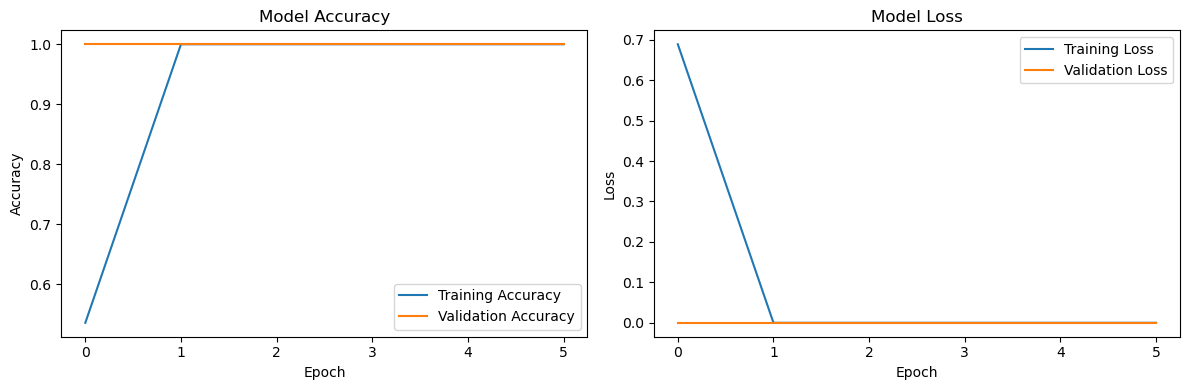

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for /Users/bhavya/Desktop/testing.png: No Damage

Final Training Metrics:
Training Accuracy: 1.0000
Training Loss: 0.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0000


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Debug prints to check directory and contents
print("Current working directory:", os.getcwd())
print("Directory contents:", os.listdir())

# Set image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Set up data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Specify the dataset directory
dataset_dir = '/Users/bhavya/Desktop/Wagonframes'  # Assuming the damaged and no_damage folders are in the current directory

# Debug prints for directory structure
print("Classes in directory:", os.listdir(dataset_dir))

# Count images in each folder
for folder in ['damaged', 'no_damage']:
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Number of images in {folder}: {len(files)}")
    else:
        print(f"Folder {folder} does not exist!")

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    classes=['damaged', 'no_damage']
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    classes=['damaged', 'no_damage']
)

# Print the number of samples
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)

# Create the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model Summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

# Save the model
model.save('damage_detection_model.h5')

# Function to predict a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path, 
        target_size=(img_width, img_height)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.
    
    prediction = model.predict(img_array)
    return "Damaged" if prediction[0] > 0.5 else "No Damage"

# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Example of how to use the prediction function
# Replace 'path_to_test_image.jpg' with an actual image path
try:
    test_image_path = '/Users/bhavya/Desktop/testing.png'  # Replace with your test image path
    result = predict_image(test_image_path)
    print(f"Prediction for {test_image_path}: {result}")
except Exception as e:
    print(f"Error during prediction: {str(e)}")

# Print final metrics
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print("\nFinal Training Metrics:")
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")

In [10]:
result = predict_image('/Users/bhavya/Desktop/testing.png')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
No Damage


In [2]:
import cv2
import numpy as np
from collections import deque
import time
import logging

class WagonDetector:
    def __init__(self, config):
        self.config = config
        
        # Initialize background subtractor
        self.bg_subtractor = cv2.createBackgroundSubtractorMOG2(
            history=self.config.history,
            varThreshold=self.config.var_threshold,
            detectShadows=self.config.detect_shadows
        )
        
        # Initialize counters and trackers
        self.wagon_count = 0
        self.crossed_objects = set()
        self.object_tracker = deque(maxlen=self.config.tracker_length)
        self.last_count_frame = 0
        
        # Initialize ROI
        self.roi_points = None
        self.roi_mask = None
        
        # Setup logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger('WagonDetector')

    def setup_roi(self, frame):
        """Initialize ROI based on frame dimensions with offset"""
        height, width = frame.shape[:2]
        
        # Define offset
        x_offset = 400  # pixels from left
        y_offset = 400  # pixels from top
        
        # Define ROI points (trapezoid shape) with offset
        self.roi_points = np.array([
            [int(width * 0.1) + x_offset, int(height * 0.4) + y_offset],  # Top left
            [int(width * 0.9) + x_offset, int(height * 0.4) + y_offset],  # Top right
            [int(width * 0.95) + x_offset, int(height * 0.8) + y_offset], # Bottom right
            [int(width * 0.05) + x_offset, int(height * 0.8) + y_offset]  # Bottom left
        ], np.int32)
        
        # Ensure ROI points are within frame boundaries
        self.roi_points = np.clip(self.roi_points, [0, 0], [width-1, height-1])
        
        # Create ROI mask
        self.roi_mask = np.zeros(frame.shape[:2], dtype=np.uint8)
        cv2.fillPoly(self.roi_mask, [self.roi_points], 255)

    def preprocess_frame(self, frame):
        """Preprocess frame for detection"""
        # Resize frame
        frame = cv2.resize(frame, (self.config.resize_width, self.config.resize_height))
        
        # Initialize ROI if not already done
        if self.roi_mask is None:
            self.setup_roi(frame)
        
        # Apply ROI mask
        roi_frame = cv2.bitwise_and(frame, frame, mask=self.roi_mask)
        
        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(roi_frame, 
                                  (self.config.blur_kernel_size, self.config.blur_kernel_size), 
                                  0)
        
        return blurred

    def detect_motion(self, frame):
        """Detect motion using background subtraction"""
        # Apply background subtraction
        fg_mask = self.bg_subtractor.apply(frame)
        
        # Apply morphological operations
        kernel = np.ones((5,5), np.uint8)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
        
        return fg_mask

    def process_frame(self, frame, frame_count):
        """Process a single frame"""
        # Preprocess frame
        processed = self.preprocess_frame(frame)
        height, width = processed.shape[:2]
        
        # Detect motion
        motion_mask = self.detect_motion(processed)
        
        # Find contours
        contours, _ = cv2.findContours(
            motion_mask,
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE
        )
        
        # Draw ROI
        cv2.polylines(frame, [self.roi_points], True, (0, 255, 255), 2)
        
        # Draw counting line with offset
        x_offset = 400
        y_offset = 400
        line_y = int(height * self.config.line_position) + y_offset
        cv2.line(frame, 
                 (int(width * 0.1) + x_offset, line_y), 
                 (int(width * 0.9) + x_offset, line_y), 
                 (0, 255, 0), 2)
        
        # Process contours
        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > self.config.min_area:
                # Get contour centroid
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    
                    # Check if centroid is in ROI
                    if cv2.pointPolygonTest(self.roi_points, (cx, cy), False) >= 0:
                        # Draw centroid
                        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)
                        
                        # Check if object crosses the counting line
                        if (abs(cy - line_y) < self.config.line_threshold and
                            frame_count - self.last_count_frame > self.config.min_frames_between_counts):
                            
                            object_id = f"{cx}_{cy}"
                            if object_id not in self.crossed_objects:
                                self.wagon_count += 1
                                self.crossed_objects.add(object_id)
                                self.last_count_frame = frame_count
                                self.logger.info(f"Wagon detected! Count: {self.wagon_count}")
                        
                        # Draw bounding rectangle
                        x, y, w, h = cv2.boundingRect(contour)
                        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Add text overlay
        cv2.putText(
            frame,
            f"Wagon Count: {self.wagon_count}",
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )
        
        return frame

class WagonDetectorConfig:
    def __init__(self):
        # Video processing parameters
        self.resize_width = 1920  # Increased for better resolution
        self.resize_height = 1080
        self.blur_kernel_size = 21
        
        # Background subtractor parameters
        self.history = 500
        self.var_threshold = 16
        self.detect_shadows = False
        
        # Detection parameters
        self.min_area = 3000
        self.line_position = 0.4  # Adjusted for offset
        self.line_threshold = 10
        self.min_frames_between_counts = 15
        self.tracker_length = 50

def process_video(video_path, output_path=None, display=True):
    # Create configuration
    config = WagonDetectorConfig()
    
    # Initialize detector
    detector = WagonDetector(config)
    
    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Error opening video file")
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Initialize video writer if output path is provided
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    frame_count = 0
    processing_times = []
    
    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            start_time = time.time()
            
            # Process frame
            processed_frame = detector.process_frame(frame, frame_count)
            
            # Calculate processing time
            processing_time = time.time() - start_time
            processing_times.append(processing_time)
            
            # Write frame if output path is provided
            if output_path:
                out.write(processed_frame)
            
            # Display frame
            if display:
                cv2.imshow('Wagon Detection', processed_frame)
                
                # Break loop if 'q' is pressed
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            
            frame_count += 1
            
    except Exception as e:
        logging.error(f"Error processing video: {str(e)}")
        
    finally:
        # Calculate and print performance metrics
        if processing_times:
            avg_processing_time = np.mean(processing_times)
            avg_fps = 1.0 / avg_processing_time if avg_processing_time > 0 else 0
            
            print(f"\nPerformance Metrics:")
            print(f"Average processing time per frame: {avg_processing_time:.3f} seconds")
            print(f"Average FPS: {avg_fps:.2f}")
        
        # Release resources
        cap.release()
        if output_path:
            out.release()
        cv2.destroyAllWindows()
    
    return detector.wagon_count

def main():
    # Example usage with specific video dimensions
    video_path = "3.mp4"  # Replace with your video path
    output_path = "output_video.mp4"     # Optional output path
    
    try:
        print("Processing video...")
        wagon_count = process_video(video_path, output_path)
        print(f"\nTotal wagons detected: {wagon_count}")
        
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

Processing video...


INFO:WagonDetector:Wagon detected! Count: 1
INFO:WagonDetector:Wagon detected! Count: 2
INFO:WagonDetector:Wagon detected! Count: 3



Performance Metrics:
Average processing time per frame: 0.134 seconds
Average FPS: 7.46

Total wagons detected: 3
